Notebook that makes plots to compare different FC methods. Plots currently not saved to pickles - just used for investigations

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate
from matplotlib import cm
from root_pandas import read_root
import scipy.stats
from matplotlib import gridspec
import matplotlib.lines as mlines
import ROOT
import scipy.stats
from matplotlib import gridspec
import matplotlib.lines as mlines
from scipy.stats import chi2
from scipy import interpolate
import pandas as pd
import math
import matplotlib.colors as colors
import pickle as pkl

Welcome to JupyROOT 6.16/00


Comparison of methodologies

In [2]:
# initialize arr to fill
# set number of universes (set manually. one of the jobs failed in this run)
num_uni= int(999)

# these are my test points. 0 = null, 8542 = global best fit, 15624 = max. others are near the 90% Wilks sensitivity contours
indices=[0,7370,8542,9071,9799,10565,12992,15624]


# reformat indices to string format used to save files
for i in range(len(indices)):
    indices[i]=f'{indices[i]:05d}'

# -2lnL dicts for test point, bf from grid, and bf from min
# grid is only run for simplex, just used as places holder in rest
RDict_pt_simp = {}
RDict_grid_simp = {}
RDict_min_simp = {}
RDict_coarse_simp = {}
RDict_coarse_new_simp = {}
RDict_pt_new_simp = {}

RDict_pt_seek = {}
RDict_grid_seek = {}
RDict_min_seek = {}
RDict_coarse_seek = {}

RDict_pt_mig = {}
RDict_grid_mig = {}
RDict_min_mig = {}
RDict_coarse_mig = {}

In [3]:
# loop through text files and save to dict
for k in indices:
#     print(k)
    pT_list=[]
    grid_list=[]
    coarse_list=[]
    min_list=[]
    with open("FCMethodsTests/chis_simplex_"+k+".txt","r") as chi:
        lines = chi.readlines()
        for i in range(num_uni):
            lines[i*4].strip() #minimizer
            lines[i*4+1].strip() # coarse grid +min
            lines[i*4+2].strip() # pt
            lines[i*4+3].strip() # pt

            vals0 = lines[i*4].split(" ")
            vals1 = lines[i*4+1].split(" ")
            vals2 = lines[i*4+2].split(" ")
            vals3 = lines[i*4+3].split(" ")
            
            for j in range(len(vals0)):
                min_list.append(float(vals0[j]))
            for j in range(len(vals1)):
                coarse_list.append(float(vals1[j]))
            for j in range(len(vals2)):
                pT_list.append(float(vals2[j]))
            for j in range(len(vals3)):
                if (float(vals3[j]) >1000):
                    grid_list.append(float(vals2[j]))  
                else:
                    grid_list.append(float(vals3[j]))

#     save to dictionary        
    RDict_pt_simp[k] = pT_list
    RDict_grid_simp[k] = grid_list
    RDict_min_simp[k] = min_list
    RDict_coarse_simp[k] = coarse_list
    
# loop through text files and save to dict
for k in indices:
#     print(k)
    pT_list=[]
    grid_list=[]
    coarse_list=[]
    min_list=[]
    with open("FCMethodsTests/chis_simplex_coarse_"+k+".txt","r") as chi:
        lines = chi.readlines()
        for i in range(num_uni):
            lines[i*4].strip() #minimizer
            lines[i*4+1].strip() # coarse grid +min
            lines[i*4+2].strip() # pt
            lines[i*4+3].strip() # pt

            vals0 = lines[i*4].split(" ")
            vals1 = lines[i*4+1].split(" ")
            vals2 = lines[i*4+2].split(" ")
            vals3 = lines[i*4+3].split(" ")
            
            for j in range(len(vals0)):
                min_list.append(float(vals0[j]))
            for j in range(len(vals1)):
                coarse_list.append(float(vals1[j]))
            for j in range(len(vals2)):
                pT_list.append(float(vals2[j]))
            for j in range(len(vals3)):
                if (float(vals3[j]) >1000):
                    grid_list.append(float(vals2[j]))  
                else:
                    grid_list.append(float(vals3[j]))

#     save to dictionary        
    RDict_pt_new_simp[k] = pT_list
    RDict_coarse_new_simp[k] = coarse_list
    
# loop through text files and save to dict
for k in indices:
#     print(k)
    pT_list=[]
    grid_list=[]
    coarse_list=[]
    min_list=[]
    with open("FCMethodsTests/chis_seek_"+k+".txt","r") as chi:
        lines = chi.readlines()
        for i in range(num_uni):
            lines[i*4].strip() #minimizer
            lines[i*4+1].strip() # coarse grid +min
            lines[i*4+2].strip() # pt
            lines[i*4+3].strip() # pt

            vals0 = lines[i*4].split(" ")
            vals1 = lines[i*4+1].split(" ")
            vals2 = lines[i*4+2].split(" ")
            vals3 = lines[i*4+3].split(" ")
            
            for j in range(len(vals0)):
                min_list.append(float(vals0[j]))
            for j in range(len(vals1)):
                coarse_list.append(float(vals1[j]))
            for j in range(len(vals2)):
                pT_list.append(float(vals2[j]))
            for j in range(len(vals3)):
                grid_list.append(float(vals3[j]))

#     save to dictionary        
    RDict_pt_seek[k] = pT_list
    RDict_grid_seek[k] = grid_list
    RDict_min_seek[k] = min_list
    RDict_coarse_seek[k] = coarse_list
    
# loop through text files and save to dict
for k in indices:
#     print(k)
    pT_list=[]
    grid_list=[]
    coarse_list=[]
    min_list=[]
    with open("FCMethodsTests/chis_migrad_"+k+".txt","r") as chi:
        lines = chi.readlines()
        for i in range(num_uni):
            lines[i*4].strip() #minimizer
            lines[i*4+1].strip() # coarse grid +min
            lines[i*4+2].strip() # pt
            lines[i*4+3].strip() # pt

            vals0 = lines[i*4].split(" ")
            vals1 = lines[i*4+1].split(" ")
            vals2 = lines[i*4+2].split(" ")
            vals3 = lines[i*4+3].split(" ")
            
            for j in range(len(vals0)):
                min_list.append(float(vals0[j]))
            for j in range(len(vals1)):
                coarse_list.append(float(vals1[j]))
            for j in range(len(vals2)):
                pT_list.append(float(vals2[j]))
            for j in range(len(vals3)):
                grid_list.append(float(vals3[j]))

#     save to dictionary        
    RDict_pt_mig[k] = pT_list
    RDict_grid_mig[k] = grid_list
    RDict_min_mig[k] = min_list
    RDict_coarse_mig[k] = coarse_list

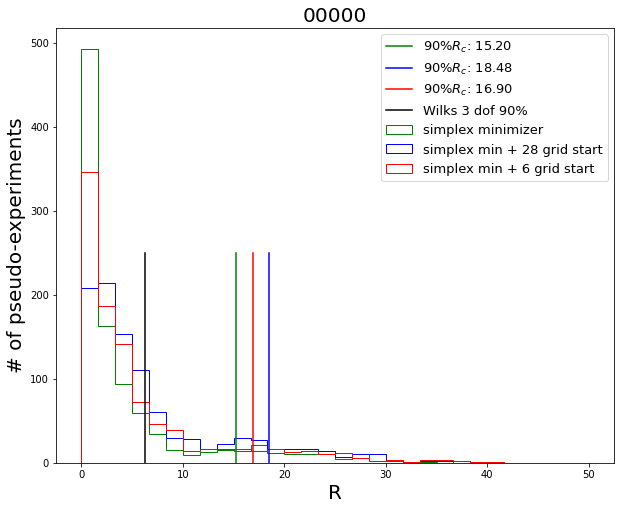

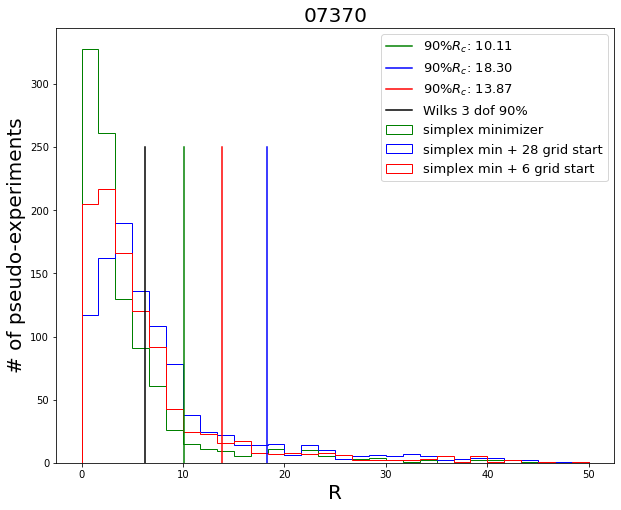

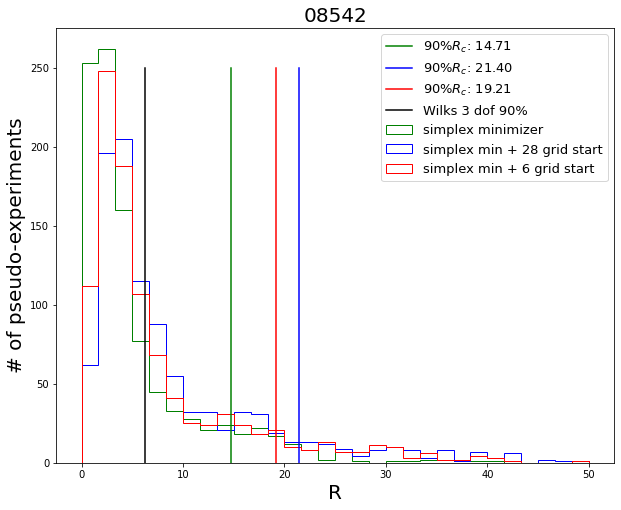

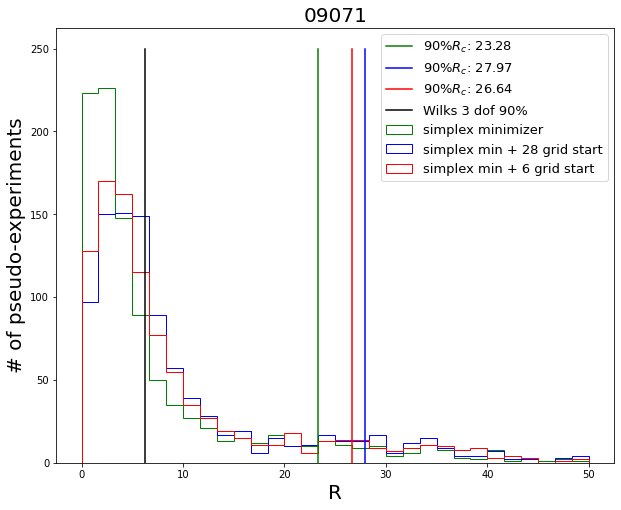

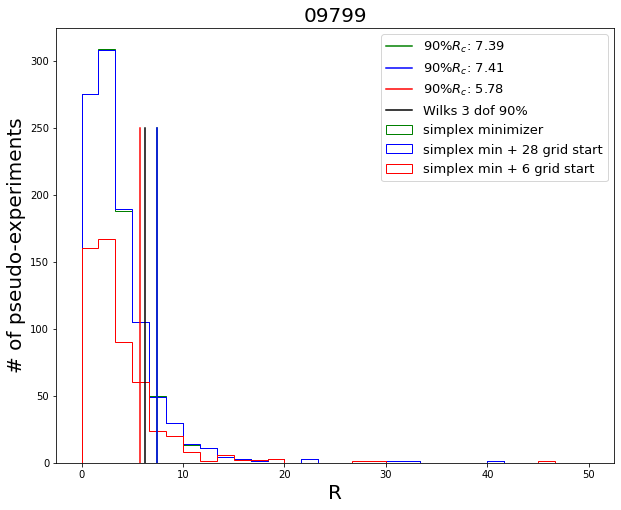

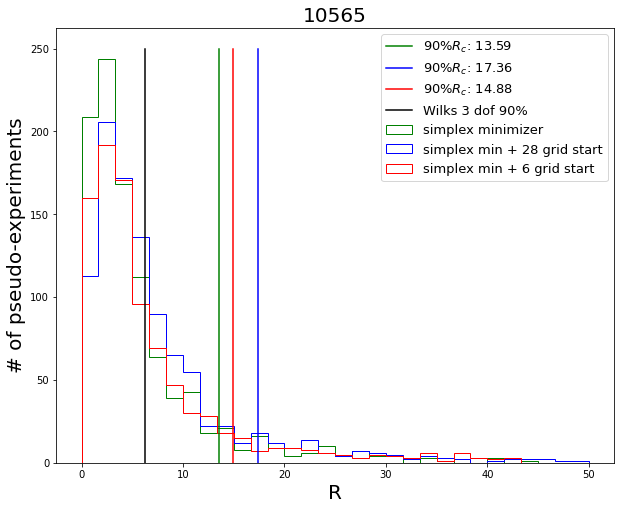

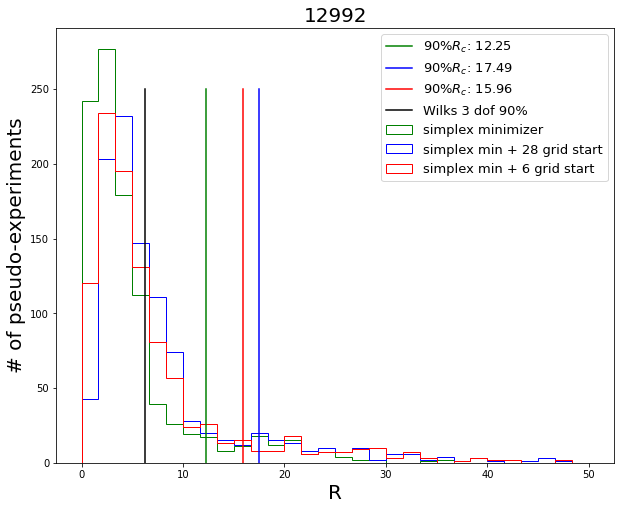

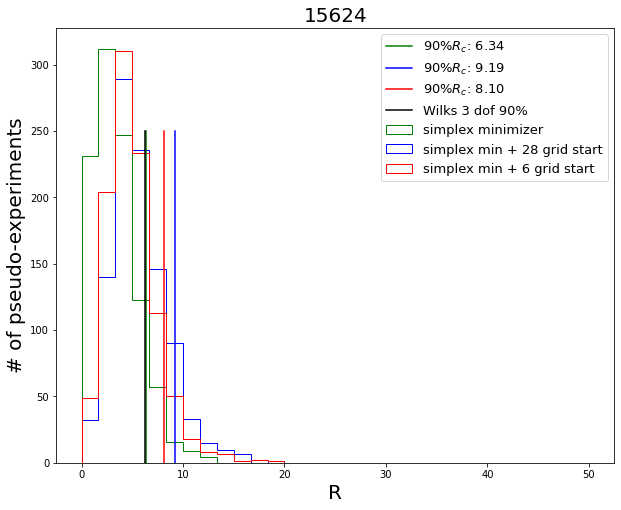

In [4]:
# look at each index individually
R_crits=[]
for i in indices:
#     first get lists of all values
    min_simp_list=RDict_min_simp[i]
    pT_simp_list=RDict_pt_simp[i]
    grid_simp_list=RDict_grid_simp[i]
    coarse_simp_list=RDict_coarse_simp[i]
    pT_simp_new_list=RDict_pt_new_simp[i]
    coarse_simp_new_list=RDict_coarse_new_simp[i]
    
    min_seek_list=RDict_min_seek[i]
    pT_seek_list=RDict_pt_seek[i]
    coarse_seek_list=RDict_coarse_seek[i]
    
    min_mig_list=RDict_min_mig[i]
    pT_mig_list=RDict_pt_mig[i]
    coarse_mig_list=RDict_coarse_mig[i]
    
    # make an R plot for each method
    delta_min_simp=[]
    delta_grid_simp=[]
    delta_coarse_simp=[]
    delta_coarse_new_simp=[]
    delta_min_seek=[]
    delta_coarse_seek=[]
    delta_min_mig=[]
    delta_coarse_mig=[]
    
    for u in range(num_uni):
        delta_min_simp.append(pT_simp_list[u]-min_simp_list[u])
        delta_grid_simp.append(pT_simp_list[u]-grid_simp_list[u])
        delta_coarse_simp.append(pT_simp_list[u]-coarse_simp_list[u])
        delta_coarse_new_simp.append(pT_simp_new_list[u]-coarse_simp_new_list[u])
        delta_min_seek.append(pT_seek_list[u]-min_simp_list[u])
        delta_coarse_seek.append(pT_seek_list[u]-coarse_seek_list[u])
        delta_min_mig.append(pT_mig_list[u]-min_mig_list[u])
        delta_coarse_mig.append(pT_mig_list[u]-coarse_mig_list[u])

#     put the lists in order and find 90th percentile
    delta_grid_simp.sort()
#     print(delta_grid_simp)
    delta_min_simp.sort()
    delta_coarse_simp.sort()
    delta_coarse_new_simp.sort()
    delta_min_seek.sort()
    delta_coarse_seek.sort()
    delta_min_mig.sort()
    delta_coarse_mig.sort()
    val_90th_min_simp =delta_min_simp[math.floor(num_uni*.9)]
    val_90th_grid_simp =delta_grid_simp[math.floor(num_uni*.9)]
    val_90th_coarse_simp =delta_coarse_simp[math.floor(num_uni*.9)]
    val_90th_coarse_new_simp =delta_coarse_new_simp[math.floor(num_uni*.9)]
    val_90th_min_seek =delta_min_seek[math.floor(num_uni*.9)]
    val_90th_coarse_seek =delta_coarse_seek[math.floor(num_uni*.9)]
    val_90th_min_mig =delta_min_mig[math.floor(num_uni*.9)]
    val_90th_coarse_mig =delta_coarse_mig[math.floor(num_uni*.9)]
    
#     R_crits.append([val_90th_grid_simp,val_90th_min_simp,val_90th_coarse_simp,val_90th_min_seek,val_90th_coarse_seek,val_90th_min_mig,val_90th_coarse_mig])
    
    # plot some examples
    # turn into histograms
    myrange=[0,50]
    fig,ax = plt.subplots(figsize=(10,8))
    
#      ['gray','black','orange','green','purple','blue','brown','plum','tan','darkorchid','salmon','powderblue']
#     plt.hist(delta_grid_simp,bins=30,range=myrange,histtype='step',label="grid only",color='darkorchid')
    plt.hist(delta_min_simp,bins=30,range=myrange,histtype='step',label="simplex minimizer",color='green')
    plt.hist(delta_coarse_simp,bins=30,range=myrange,histtype='step',label="simplex min + 28 grid start",color='blue')
    plt.hist(delta_coarse_new_simp,bins=30,range=myrange,histtype='step',label="simplex min + 6 grid start",color='red')
#     plt.hist(delta_min_seek,bins=30,range=myrange,histtype='step',label="seek minimizer",color='orange')
#     plt.hist(delta_coarse_seek,bins=30,range=myrange,histtype='step',label="seek min + coarse start",color='plum')
#     plt.hist(delta_min_mig,bins=30,range=myrange,histtype='step',label="migrad minimizer",color='purple')
#     plt.hist(delta_coarse_mig,bins=30,range=myrange,histtype='step',label="migrad min + coarse start",color='brown')
    
#     plt.plot([val_90th_grid_simp,val_90th_grid_simp],[0,250],color='darkorchid',label=r'$90\% R_c$: '+str("%.2f" %val_90th_grid_simp))
    plt.plot([val_90th_min_simp,val_90th_min_simp],[0,250],color='green',label=r'$90\% R_c$: '+str("%.2f" %val_90th_min_simp))
    plt.plot([val_90th_coarse_simp,val_90th_coarse_simp],[0,250],color='blue',label=r'$90\% R_c$: '+str("%.2f" %val_90th_coarse_simp))
    plt.plot([val_90th_coarse_new_simp,val_90th_coarse_new_simp],[0,250],color='red',label=r'$90\% R_c$: '+str("%.2f" %val_90th_coarse_new_simp))

    #    plt.plot([val_90th_min_seek,val_90th_min_seek],[0,250],color='orange',label=r'$90\% R_c$: '+str("%.2f" %val_90th_min_seek))
#     plt.plot([val_90th_coarse_seek,val_90th_coarse_seek],[0,250],color='plum',label=r'$90\% R_c$: '+str("%.2f" %val_90th_coarse_seek))
#     plt.plot([val_90th_min_mig,val_90th_min_mig],[0,250],color='purple',label=r'$90\% R_c$: '+str("%.2f" %val_90th_min_mig))
#     plt.plot([val_90th_coarse_mig,val_90th_coarse_mig],[0,250],color='brown',label=r'$90\% R_c$: '+str("%.2f" %val_90th_coarse_mig))
    
    plt.plot([6.25,6.25],[0,250],color='black',label='Wilks 3 dof 90%')
    plt.xlabel(r"R",fontsize=20)
    plt.ylabel(r"# of pseudo-experiments",fontsize=20)
    plt.title(str(i),fontsize=20)
    plt.legend(fontsize=13)
    plt.show()
    plt.close()

In [5]:
# print out the results
# print out some test points
#  R_crits.append([val_90th_min_simp,val_90th_coarse_simp,val_90th_min_seek,val_90th_coarse_seek,val_90th_min_mig,val_90th_coarse_mig])
print("Simplex min, Simplex min+coarse, Seek min, Seek min+coarse, Migrad min, Migrad min+coarse") 
print("Null: ")
print(R_crits[0][0],R_crits[0][1],R_crits[0][2],R_crits[0][3],R_crits[0][4],R_crits[0][5])
print("R_crit at gbf =", R_list[8542])
print("R_crit at max =", R_list[15624])
print("R_crit at 12992 =", R_list[12992])
print("R_crit at 9799 =", R_list[9799])
print("R_crit at 9071 =", R_list[9071])
print("R_crit at 10565 =", R_list[10565])
print("R_crit at 7370 =", R_list[7370])

Simplex min, Simplex min+coarse, Seek min, Seek min+coarse, Migrad min, Migrad min+coarse
Null: 


IndexError: list index out of range